In [120]:
import pandas as pd
import pylab
import scipy.stats as stats
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


In [121]:
df = pd.read_csv("gestures.csv")
df = df.dropna()

In [122]:
df.head()     # Display the first few rows of the dataset

,time,gfc_x,gfc_y,gfc_z,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,inc_x,inc_y,inc_z,label
0,2023-06-08 16:44:56.020,0.0117,0.0169,0.9767,0.0000,0.00000,0.0000,0.025950,-0.003650,-0.130100,0.00,0.00,0.00,0.000000,0.000000,0.00000,rest
1,2023-06-08 16:44:56.040,0.0117,0.0169,0.9767,0.0000,0.00000,0.0000,0.051900,-0.007300,-0.260200,176.22,78.18,-24.72,0.000000,0.000000,0.00000,rest
2,2023-06-08 16:44:56.060,0.0171,0.0222,0.9760,-0.0021,-0.00270,-0.1189,0.051900,-0.007300,-0.260200,176.22,78.18,-24.72,261.352275,-0.978525,0.75285,rest
3,2023-06-08 16:44:56.080,0.0171,0.0222,0.9760,-0.0042,-0.00540,-0.2378,0.051900,-0.007300,-0.260200,179.88,80.88,-28.08,348.469700,-1.304700,1.00380,rest
4,2023-06-08 16:44:56.100,0.0193,0.0198,0.9762,0.0018,-0.01195,-0.2366,0.036475,-0.007625,-0.196225,179.88,80.88,-28.08,318.916325,-1.257000,1.04580,rest


In [123]:
df.isnull().sum()

time     0
gfc_x    0
gfc_y    0
gfc_z    0
acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
inc_x    0
inc_y    0
inc_z    0
label    0
dtype: int64

In [124]:
def calculate_statistics(df):
    mean = [df[col].mean() for col in df.columns[1:-1]]
    median = [df[col].median() for col in df.columns[1:-1]]
    max = [df[col].max() for col in df.columns[1:-1]]
    min = [df[col].min() for col in df.columns[1:-1]]
    range = np.subtract(max, min)

    shapiro = [stats.shapiro(df[col]) for col in df.columns[1:-1]]
    stats_df = pd.DataFrame({"mean": mean, "median": median, "max": max, "min": min,
                             "range": range, "shapiro": shapiro}, index=df.columns[1:-1])
    return stats_df

stats_df = calculate_statistics(df)
stats_df

,mean,median,max,min,range,shapiro
gfc_x,-0.002271,0.01420,6.4463,-4.9440,11.3903,"(0.9389007091522217, 0.0)"
gfc_y,0.418555,0.41390,3.0927,-1.8108,4.9035,"(0.9714034199714661, 0.0)"
gfc_z,0.227461,0.14850,7.9522,-5.3999,13.3521,"(0.8709036707878113, 0.0)"
acc_x,0.605877,0.02520,56.8826,-36.9371,93.8197,"(0.9118216037750244, 0.0)"
acc_y,-0.983866,-0.17910,23.1357,-24.1496,47.2853,"(0.9362100958824158, 0.0)"
acc_z,0.179770,-0.18640,80.5654,-49.4844,130.0498,"(0.7141855359077454, 0.0)"
gyr_x,0.006872,-0.00165,14.5630,-14.7438,29.3068,"(0.829355776309967, 0.0)"
gyr_y,0.009117,0.00120,11.9290,-11.7345,23.6635,"(0.8961207866668701, 0.0)"
gyr_z,-0.008356,-0.00310,8.1770,-8.4886,16.6656,"(0.9396471381187439, 0.0)"
mag_x,38.795092,9.87000,212.6400,-187.6800,400.3200,"(0.7169482707977295, 0.0)"


In [125]:
df.info()     # Get information about the dataset, including data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289963 entries, 0 to 294698
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    289963 non-null  object 
 1   gfc_x   289963 non-null  float64
 2   gfc_y   289963 non-null  float64
 3   gfc_z   289963 non-null  float64
 4   acc_x   289963 non-null  float64
 5   acc_y   289963 non-null  float64
 6   acc_z   289963 non-null  float64
 7   gyr_x   289963 non-null  float64
 8   gyr_y   289963 non-null  float64
 9   gyr_z   289963 non-null  float64
 10  mag_x   289963 non-null  float64
 11  mag_y   289963 non-null  float64
 12  mag_z   289963 non-null  float64
 13  inc_x   289963 non-null  float64
 14  inc_y   289963 non-null  float64
 15  inc_z   289963 non-null  float64
 16  label   289963 non-null  object 
dtypes: float64(15), object(2)
memory usage: 39.8+ MB


In [126]:
df.describe()   # Summary


,gfc_x,gfc_y,gfc_z,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,inc_x,inc_y,inc_z
count,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000
mean,-0.002271,0.418555,0.227461,0.605877,-0.983866,0.179770,0.006872,0.009117,-0.008356,38.795092,0.754177,-1.042675,155.849428,-65.159410,-5.897247
std,0.897396,0.398154,0.891075,6.638013,2.788657,6.492441,1.912251,0.804959,1.578620,80.988901,37.761870,13.961867,109.110491,61.328673,48.700114
min,-4.944000,-1.810800,-5.399900,-36.937100,-24.149600,-49.484400,-14.743800,-11.734500,-8.488600,-187.680000,-124.200000,-102.420000,0.000000,-179.992800,-89.999200
25%,-0.355200,0.022500,-0.235500,-1.226510,-2.520900,-1.595040,-0.378700,-0.283647,-0.531500,-15.210000,-23.364000,-10.540000,62.136800,-119.688680,-29.433550
50%,0.014200,0.413900,0.148500,0.025200,-0.179100,-0.186400,-0.001650,0.001200,-0.003100,9.870000,-14.400000,1.452000,128.372150,-58.957500,0.734800
75%,0.343000,0.714100,0.968800,2.204800,0.154475,1.618990,0.499700,0.351803,0.538800,33.960000,6.240000,8.628000,248.524200,-10.962650,17.624600
max,6.446300,3.092700,7.952200,56.882600,23.135700,80.565400,14.563000,11.929000,8.177000,212.640000,106.080000,35.880000,359.998500,179.995800,89.999900


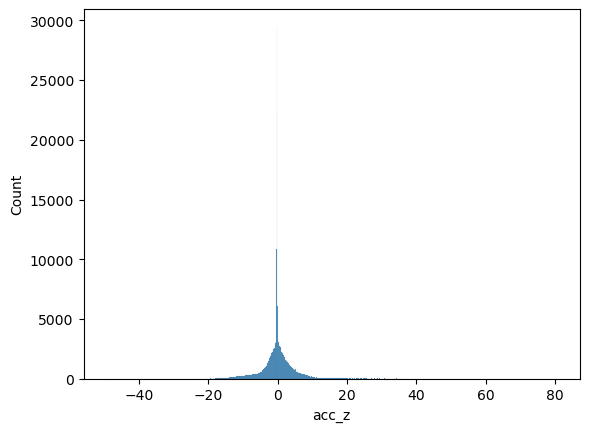

In [127]:
sns.histplot(df['acc_z'])     # Plot a histogram of 'gfc_x'
plt.show()                   # Show the plot

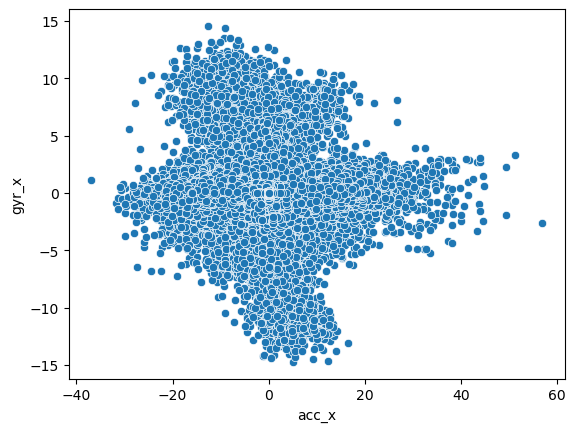

In [128]:
sns.scatterplot(x='acc_x', y='gyr_x', data=df)   # Plot a scatter plot of 'acc_x' vs 'acc_y'
plt.show()                                      # Show the plot

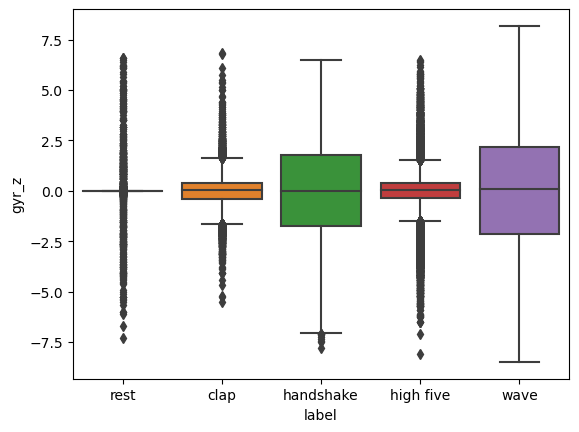

In [129]:
sns.boxplot(x='label', y='gyr_z', data=df)      # Plot a box plot of 'gyr_z' grouped by 'label'
plt.show()                                     # Show the plot


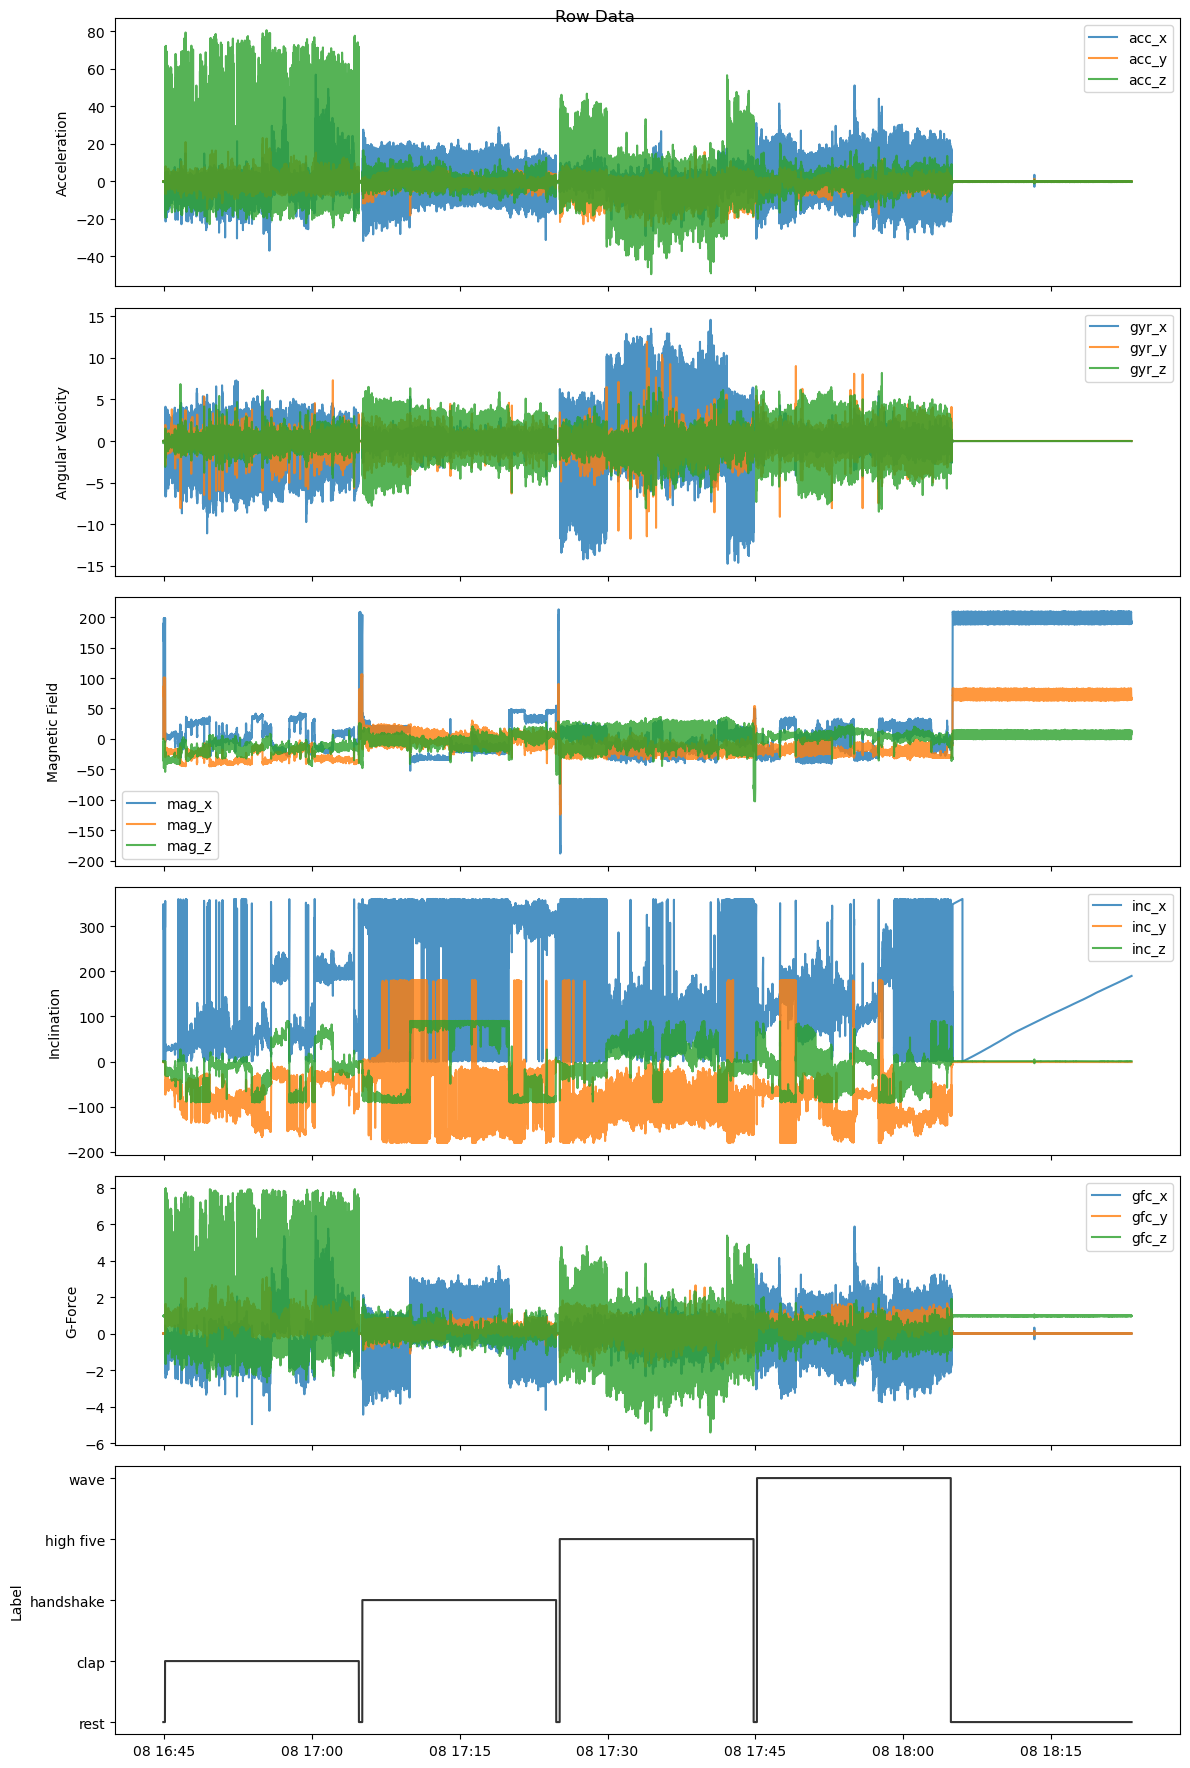

In [158]:
import matplotlib.pyplot as plt

def plot_data(df, acc=None, gyr=None, mag=None, inc=None, gfc=None, label=None, title=None):
    # Convert the 'time' column to datetime type
    df['time'] = pd.to_datetime(df['time'])

    # Determine the number of subplots based on the provided parameters
    num_subplots = sum(param is not None for param in [acc, gyr, mag, inc, gfc, label])

    # Create subplots
    fig, axs = plt.subplots(num_subplots, 1, figsize=(12, 3 * num_subplots), sharex=True)

    # Set the title based on the variable name
    if title is not None:
        fig.suptitle(title)

    # Track the current subplot index
    subplot_index = 0
    alpha = 0.8
    # Plot the sensor data
    if acc is not None:
        axs[subplot_index].plot(df['time'], df['acc_x'], label='acc_x', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['acc_y'], label='acc_y', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['acc_z'], label='acc_z', alpha=alpha)
        axs[subplot_index].set_ylabel('Acceleration')
        axs[subplot_index].legend()
        subplot_index += 1

    if gyr is not None:
        axs[subplot_index].plot(df['time'], df['gyr_x'], label='gyr_x', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['gyr_y'], label='gyr_y', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['gyr_z'], label='gyr_z', alpha=alpha)
        axs[subplot_index].set_ylabel('Angular Velocity')
        axs[subplot_index].legend()
        subplot_index += 1

    if mag is not None:
        axs[subplot_index].plot(df['time'], df['mag_x'], label='mag_x', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['mag_y'], label='mag_y', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['mag_z'], label='mag_z', alpha=alpha)
        axs[subplot_index].set_ylabel('Magnetic Field')
        axs[subplot_index].legend()
        subplot_index += 1

    if inc is not None:
        axs[subplot_index].plot(df['time'], df['inc_x'], label='inc_x', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['inc_y'], label='inc_y', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['inc_z'], label='inc_z', alpha=alpha)
        axs[subplot_index].set_ylabel('Inclination')
        axs[subplot_index].legend()
        subplot_index += 1

    if gfc is not None:
        axs[subplot_index].plot(df['time'], df['gfc_x'], label='gfc_x', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['gfc_y'], label='gfc_y', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['gfc_z'], label='gfc_z', alpha=alpha)
        axs[subplot_index].set_ylabel('G-Force')
        axs[subplot_index].legend()
        subplot_index += 1

    if label is not None:
        axs[subplot_index].plot(df['time'], df['label'], color='black', alpha=alpha)
        axs[subplot_index].set_ylabel('Label')

    # Adjust the layout
    fig.tight_layout()

    # Show the plot
    plt.show()


# Example usage
plot_data(df, acc=1, gyr=2, mag=3, inc=4, gfc=5, label=6, title="Row Data")


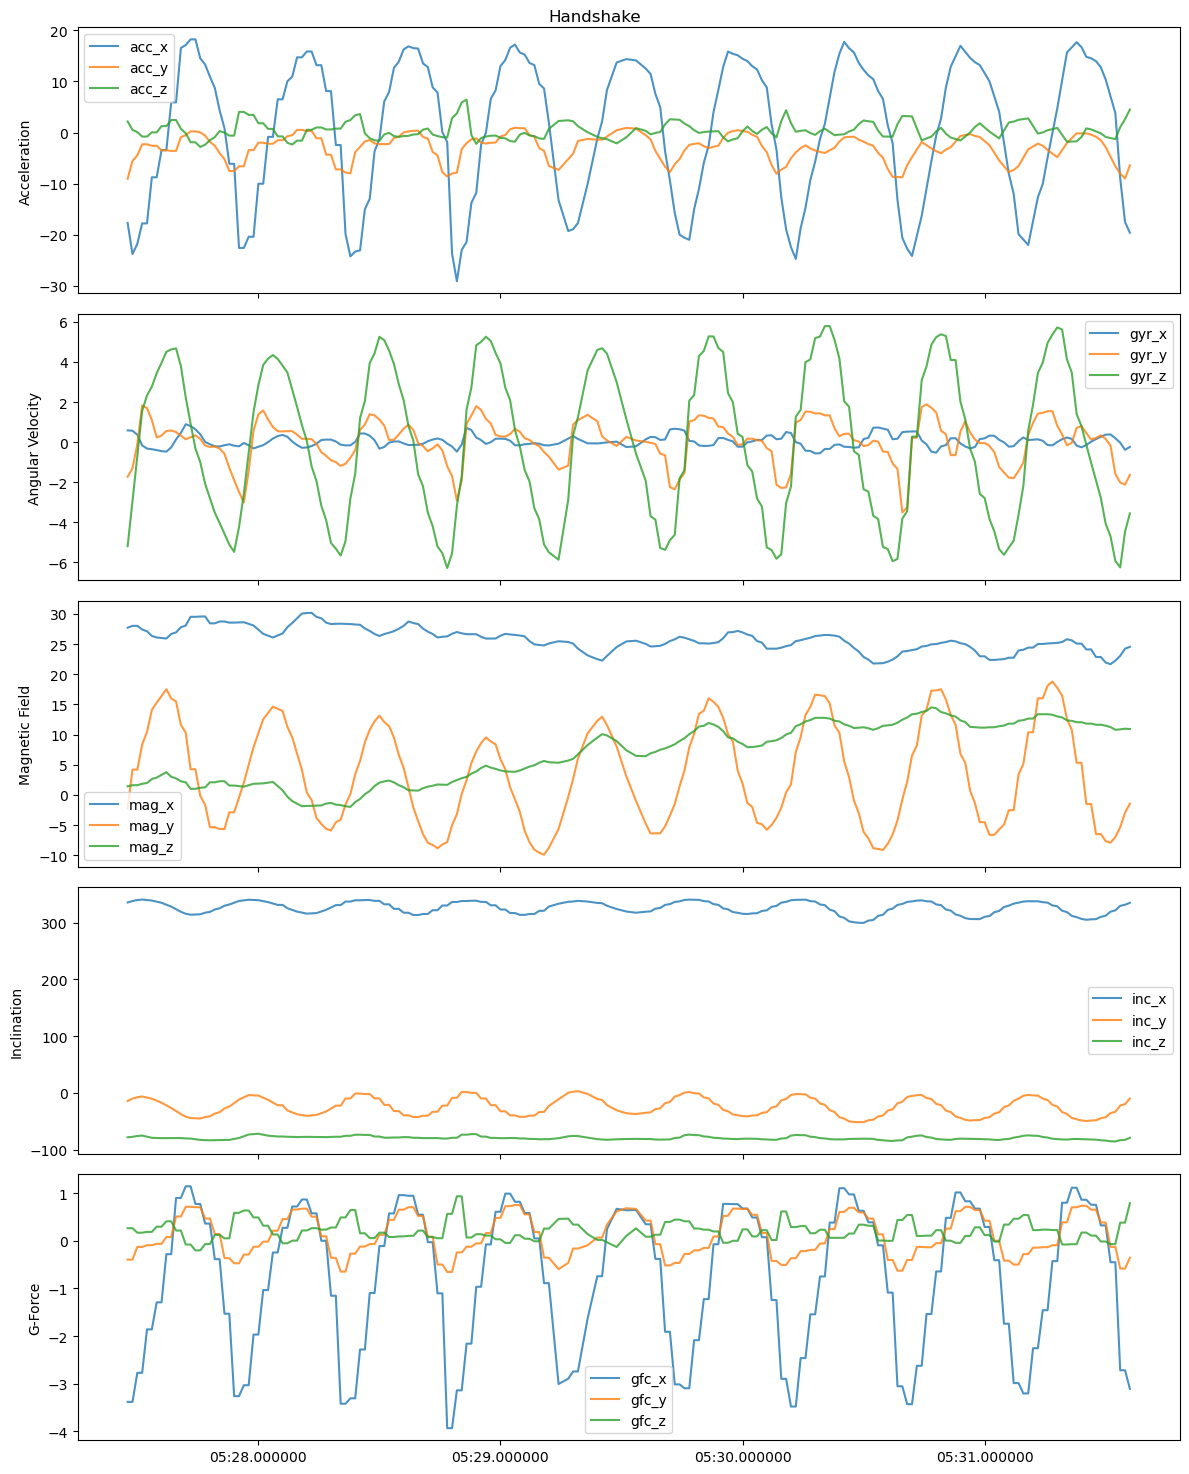

In [159]:
handshake = df[df['label']=='handshake']
plot_data(handshake[1000:1200],acc=1 ,gyr=2, mag=3, inc=4, gfc=6,title='Handshake')


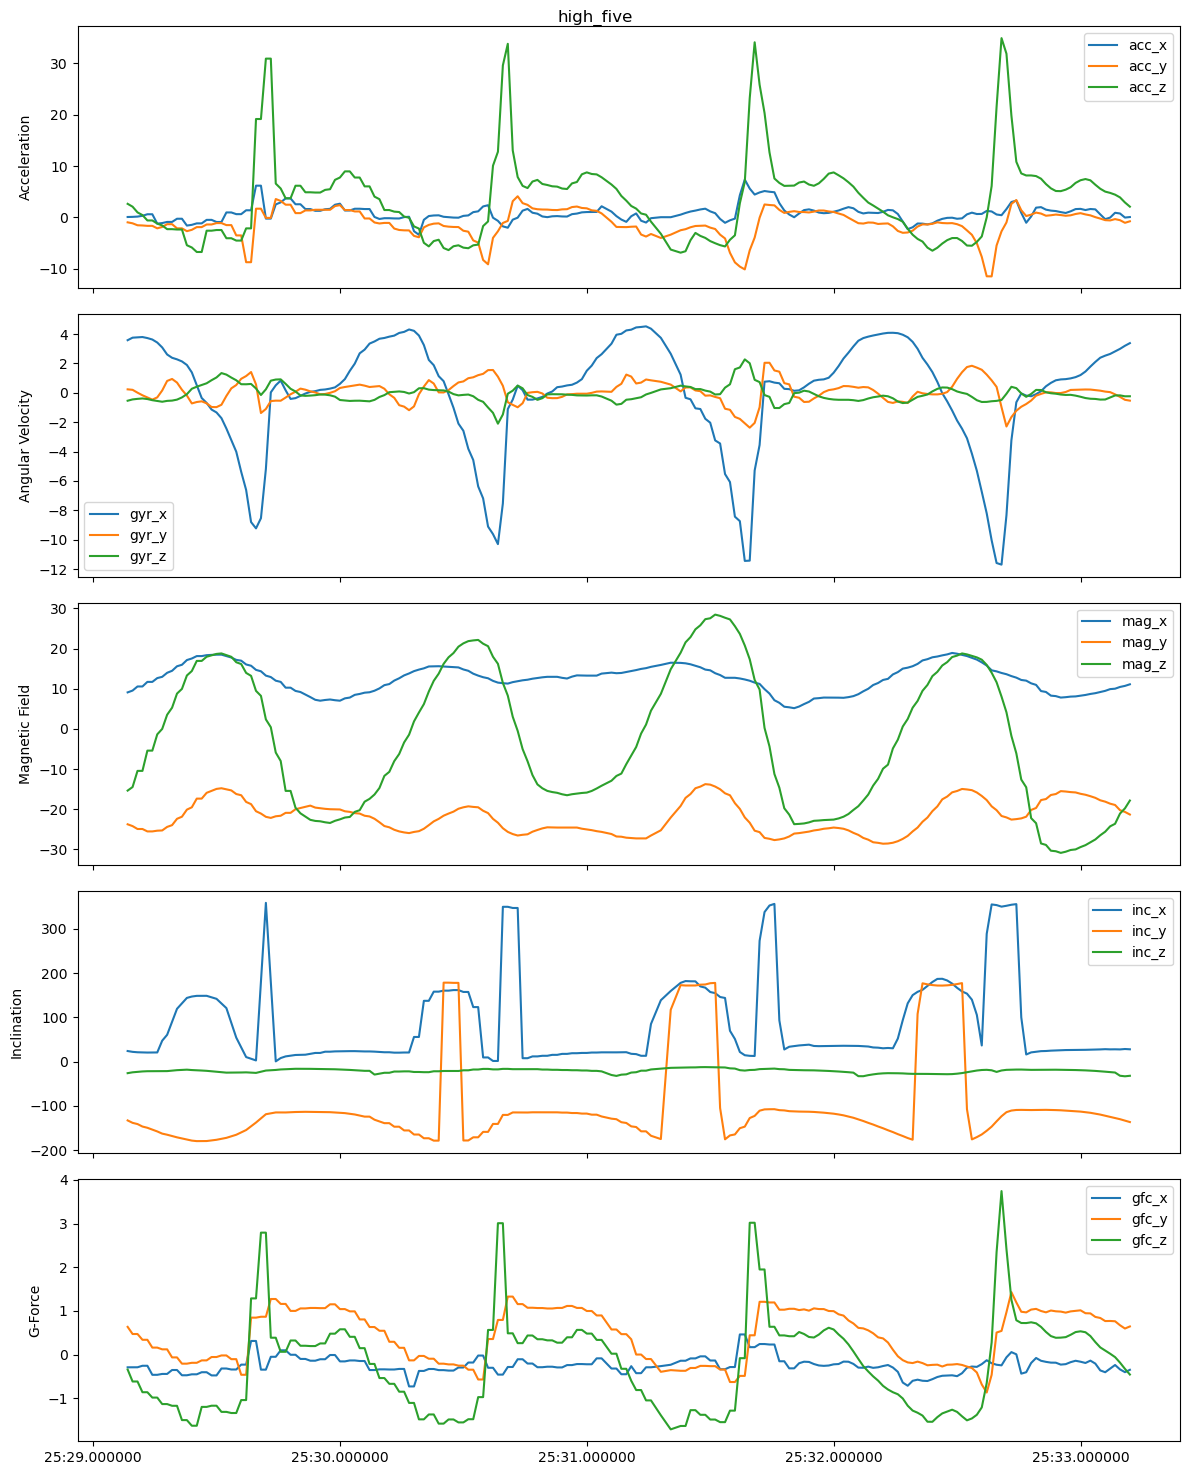

In [148]:
high_five = df[df['label']=='high five']
plot_data(high_five[1000:1200],acc=1 ,gyr=2, mag=3, inc=4, gfc=6,title="high_five")


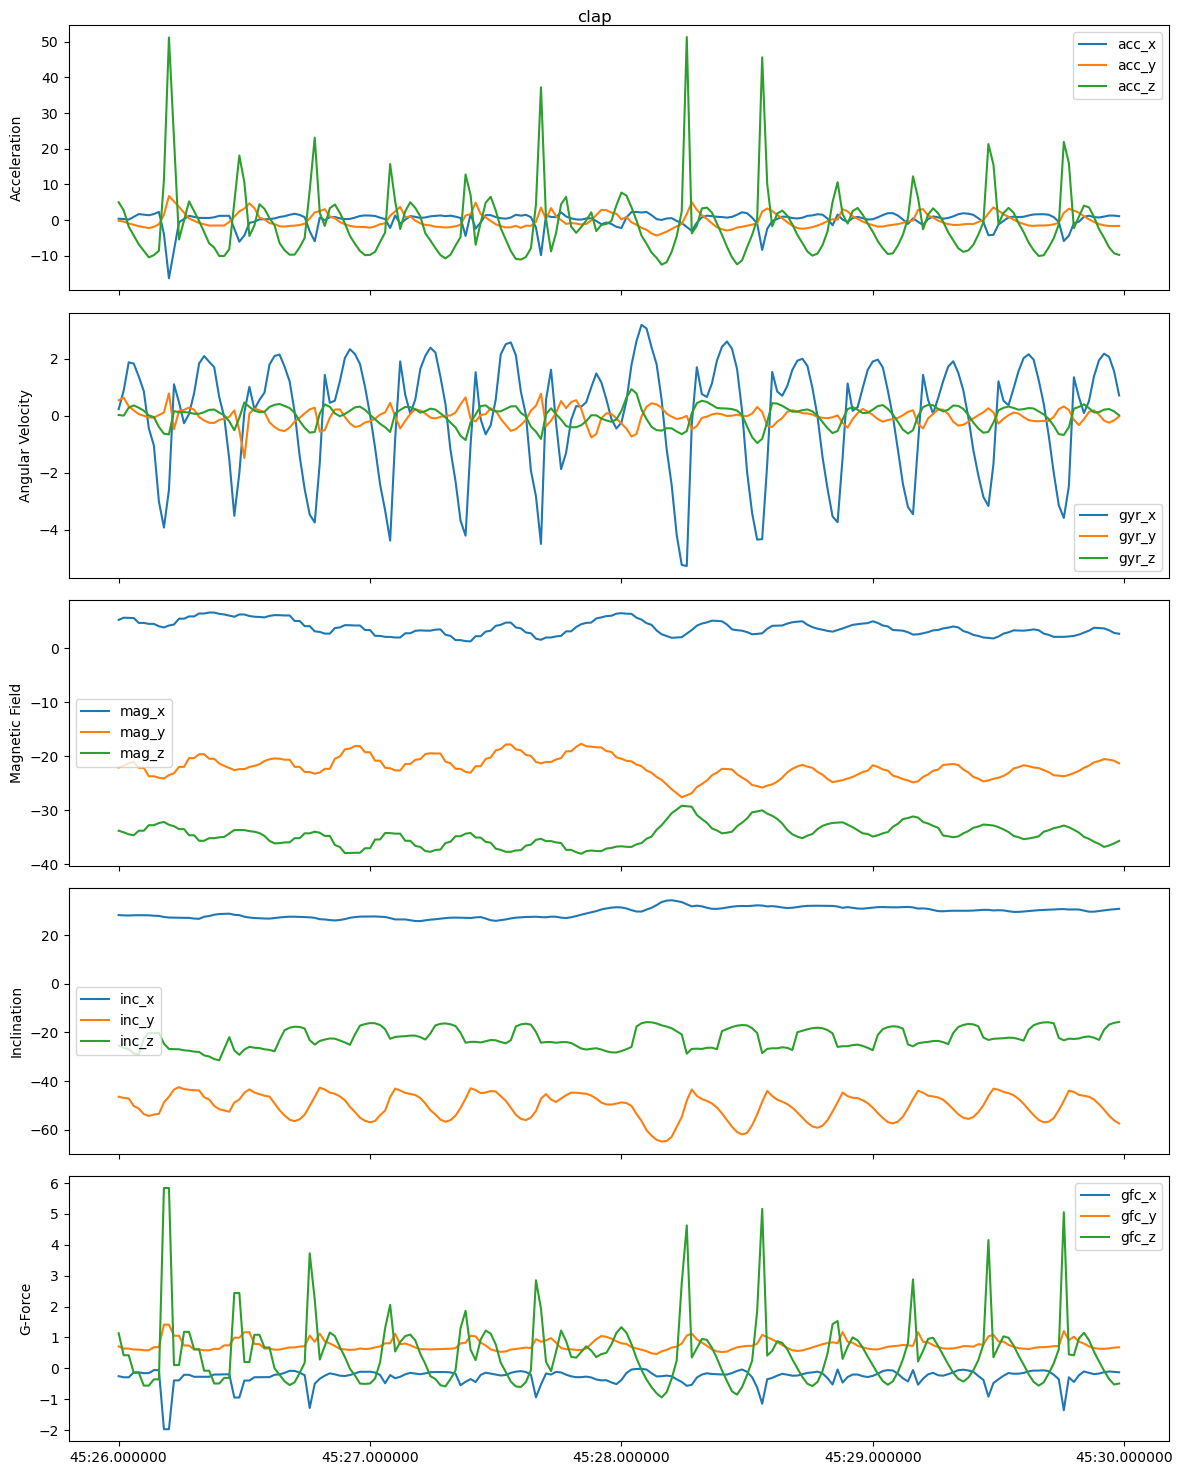

In [149]:
clap = df[df['label']=='clap']
plot_data(clap[1000:1200],acc=1 ,gyr=2, mag=3, inc=4, gfc=6,title='clap')


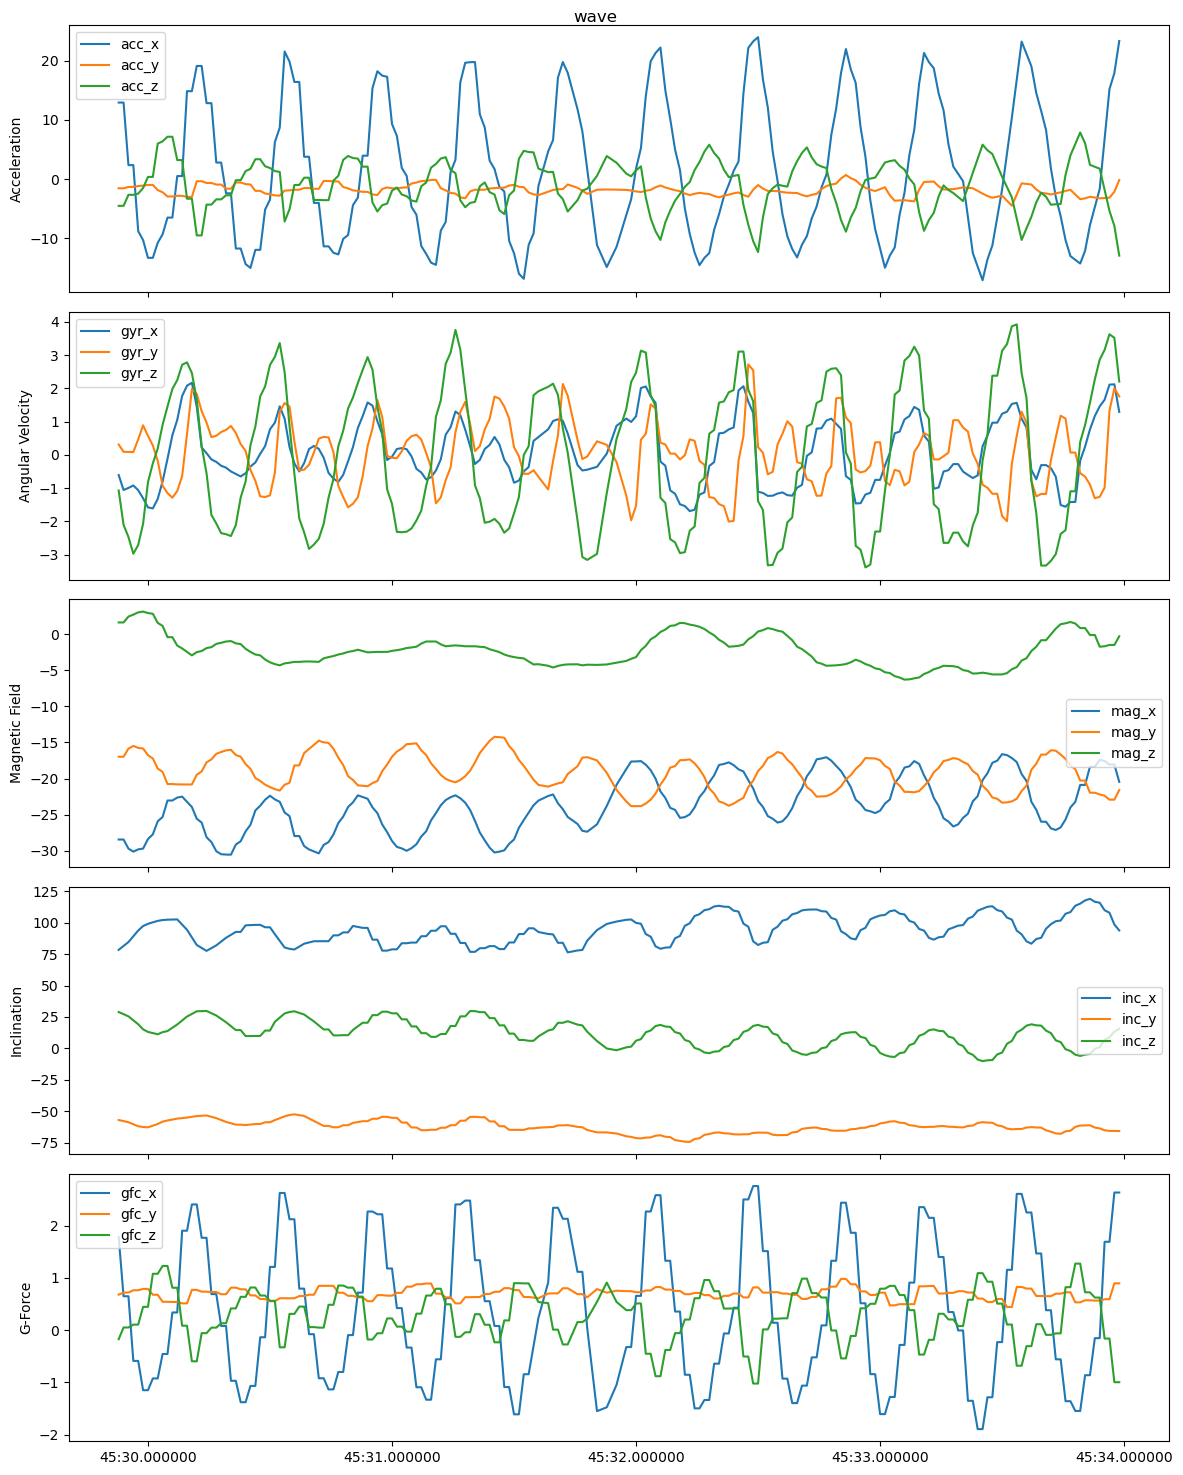

In [150]:
wave = df[df['label']=='wave']
plot_data(wave[1000:1200],acc=1 ,gyr=2, mag=3, inc=4, gfc=6,title='wave')


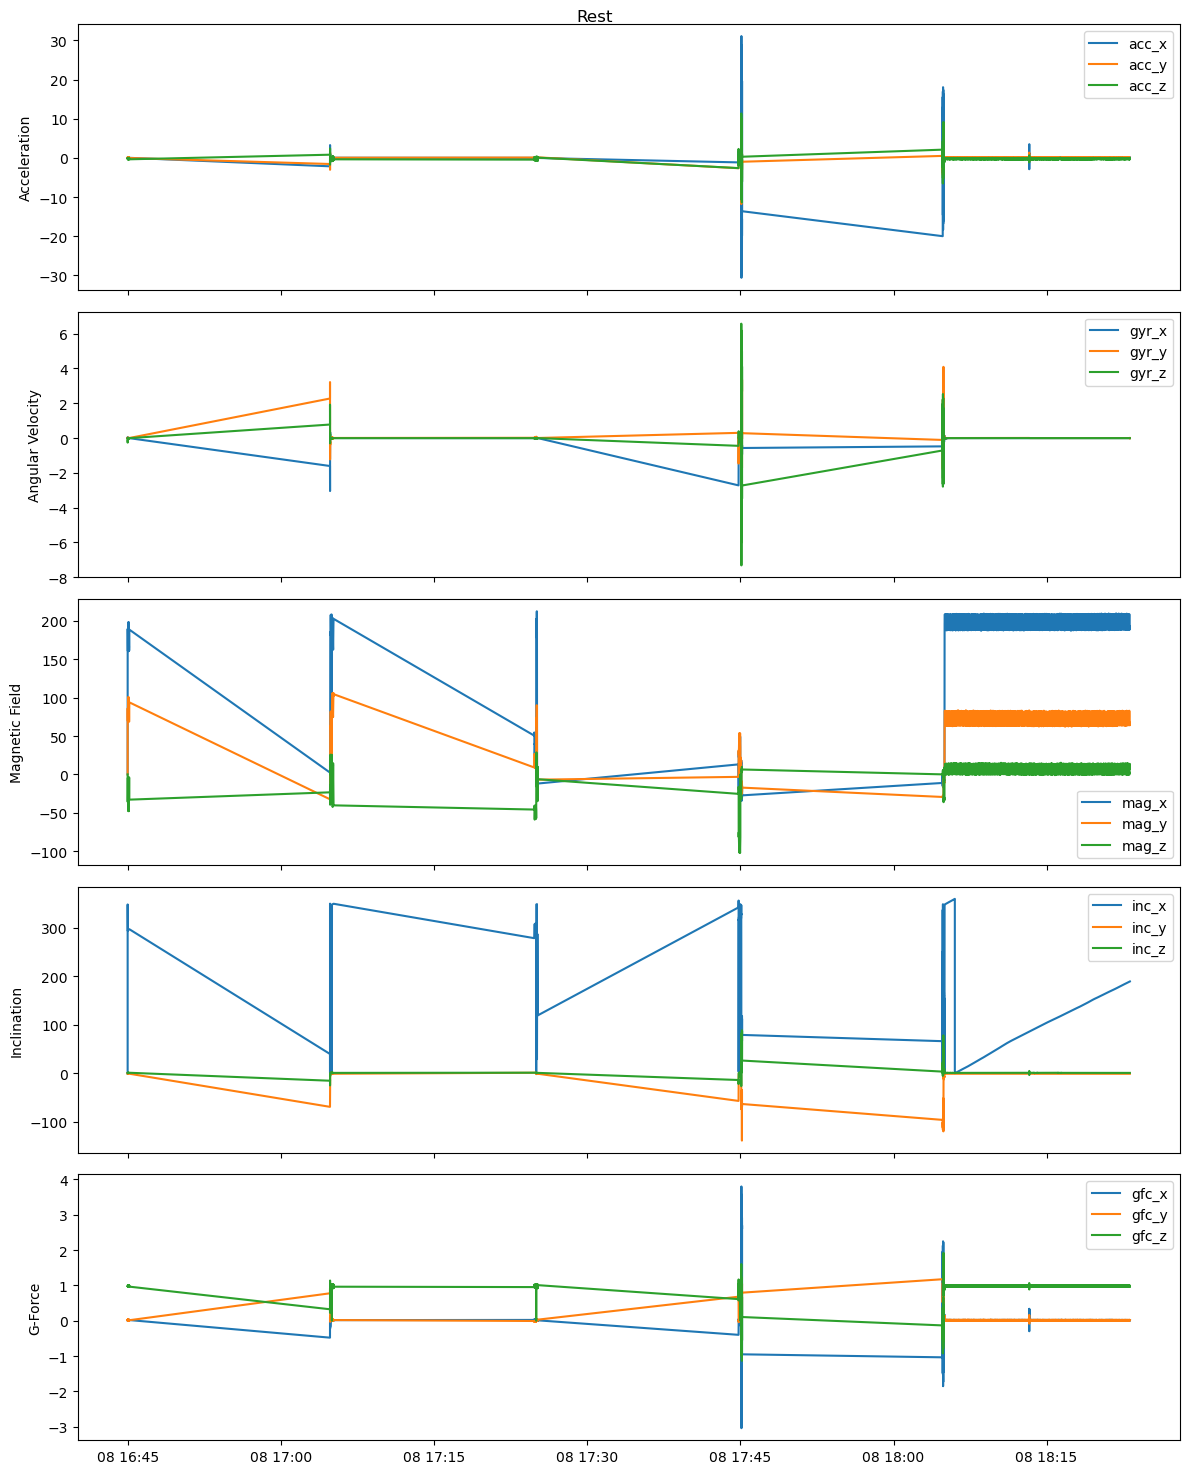

In [151]:
rest = df[df['label']=='rest']
plot_data(rest,acc=1 ,gyr=2, mag=3, inc=4, gfc=6,title='Rest')

In [ ]:
df['label'].unique()

# Data prep

In [ ]:
aaa

In [ ]:
from scipy.stats import shapiro

def check_normality(df):
    normality_results = {}
    for column in df.columns:
        if df[column].dtype != 'object' and df[column].dtype != 'datetime64[ns]':
            _, p_value = shapiro(df[column])
            normality_results[column] = p_value
    return normality_results
normality_results = check_normality(df)
for column, p_value in normality_results.items():
    if p_value > 0.05:
        print(f"{column} is normally distributed")
    else:
        print(f"{column} is not normally distributed")


In [ ]:
df

In [ ]:
new_data = df.copy()  # Create a copy of the original DataFrame

new_data['time'] = pd.to_datetime(new_data['time'])
new_data

In [ ]:
new_data = df.copy()  # Create a copy of the original DataFrame

new_data['time'] = pd.to_datetime(new_data['time'])
new_data['date'] = new_data['time'].dt.strftime('%Y-%m-%d')
new_data['time'] = new_data['time'].dt.strftime('%H:%M:%S.%f')

# Display the updated DataFrame
new_data.head()

In [ ]:
from scipy.signal import savgol_filter


In [ ]:
# Convert the 'time' column to datetime type
df['time'] = pd.to_datetime(df['time'])

# Set the desired time range
start_time = '16:50'
end_time = '16:50:30'

# Filter the DataFrame based on the time range
filtered_df = df[(df['time'] >= start_time) & (df['time'] <= end_time)]

# Plotting the sensor data
# fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Accelerometer data
# plt.plot(filtered_df['time'], filtered_df['acc_x'], label='acc_x')
# plt.plot(filtered_df['time'], filtered_df['acc_y'], label='acc_y')
plt.plot(filtered_df['time'], filtered_df['acc_y'], label='acc_z')

yhat = savgol_filter(filtered_df['acc_y'], 50, 2) # window size 51, polynomial order 3

plt.plot(filtered_df['time'], yhat, label='acc_x')

plt.title('Claping Acceleration')
plt.legend()

# Repeat the above steps for other sensor data if desired

plt.show()
